In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. 데이터 감잡기

In [2]:
# Load data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals
> count = casual + registered

In [5]:
set(train.columns) - set(test.columns)

{'casual', 'count', 'registered'}

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# null check -> 없음(굿)
train.isnull().sum(), test.isnull().sum()

(datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 dtype: int64,
 datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 dtype: int64)

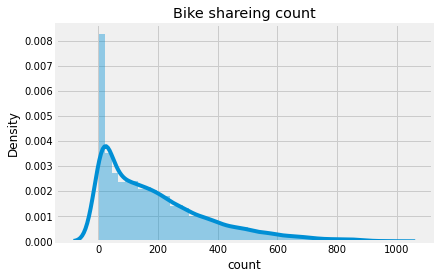

Skew: 1.2420662117180776
Kurt: 1.3000929518398334
Mean:191.57413191254824, Std:181.14445383028496


In [8]:
# 첨도와 왜도로 전체적인 구조 파악
sns.distplot(train['count'])
plt.title("Bike shareing count")
plt.show()
print("Skew:", train['count'].skew())
print("Kurt:", train['count'].kurt())
print("Mean:{}, Std:{}".format(train['count'].mean(), train['count'].std()))

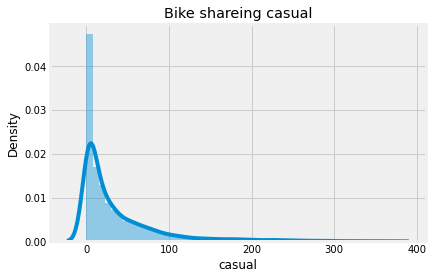

Skew: 2.4957483979812567
Kurt: 7.551629305632764
Mean:36.02195480433584, Std:49.9604765726498


In [9]:
# 첨도와 왜도로 전체적인 구조 파악
sns.distplot(train['casual'])
plt.title("Bike shareing casual")
plt.show()
print("Skew:", train['casual'].skew())
print("Kurt:", train['casual'].kurt())
print("Mean:{}, Std:{}".format(train['casual'].mean(), train['casual'].std()))

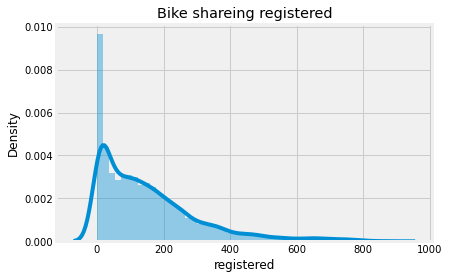

Skew: 1.5248045868182296
Kurt: 2.6260809999210672
Mean:155.5521771082124, Std:151.0390330819246


In [10]:
# 첨도와 왜도로 전체적인 구조 파악
sns.distplot(train['registered'])
plt.title("Bike shareing registered")
plt.show()
print("Skew:", train['registered'].skew())
print("Kurt:", train['registered'].kurt())
print("Mean:{}, Std:{}".format(train['registered'].mean(), train['registered'].std()))

- 관측 결과
1) skew: 비대칭성 (a=0: 대칭)
2) kurtosis: 뾰족한 정도, 어느 정도 집중적으로 중심에 몰려 있는가를 측정
3) count ~ register + causal 모두 유사한 형태를 보임
4) feature engineering을 통해 조정 필요

# 2. EDA
- target
- 각 변수의 데이터 타입
- 각 변수와 target의 관계
- 엔지니어링 요소 확인

In [11]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [12]:
# datetime: object -> datetime
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

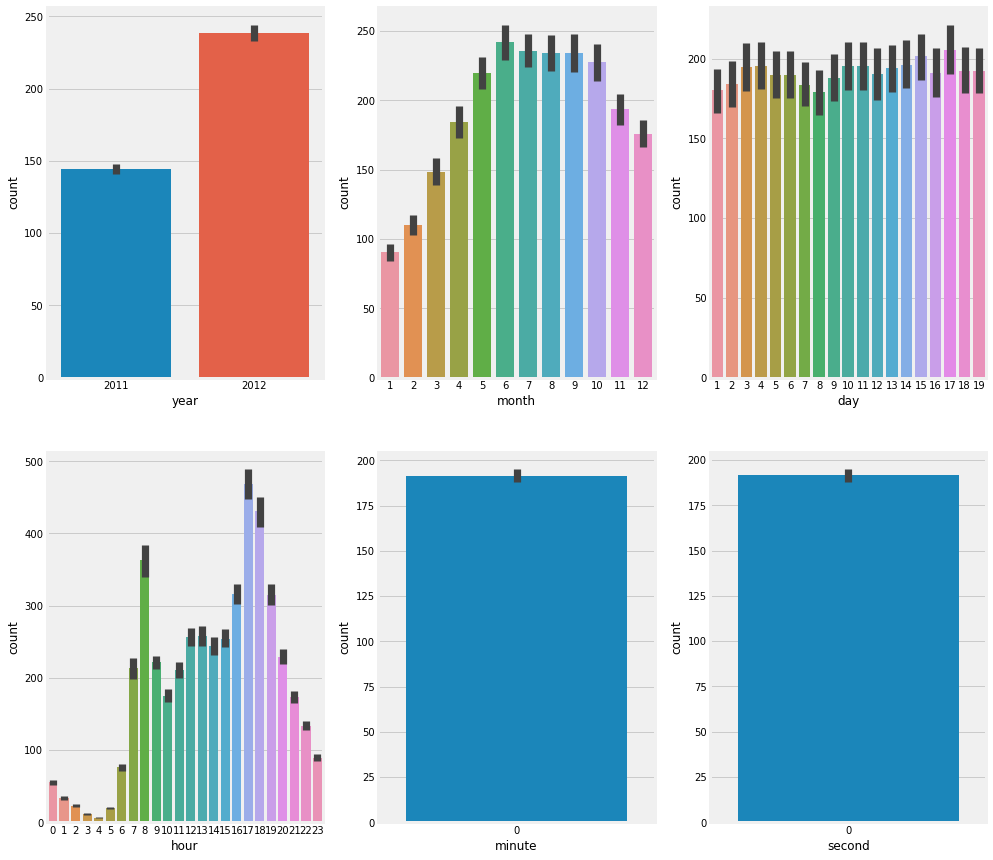

In [13]:
f, ax = plt.subplots(2,3, figsize=(15, 15))

sns.barplot(x= 'year', y='count', data=train, ax=ax[0,0])
sns.barplot(x= 'month', y='count', data=train, ax=ax[0,1])
sns.barplot(x= 'day', y='count', data=train, ax=ax[0,2])

sns.barplot(x= 'hour', y='count', data=train, ax=ax[1,0])
sns.barplot(x= 'minute', y='count', data=train, ax=ax[1,1])
sns.barplot(x= 'second', y='count', data=train, ax=ax[1,2])
plt.show()

- 관측 결과:
1) 연도별 대여량은 11년도보다 12년도에 더 늘어남
2) 월별 대여량은 대체로 겨울보다 여름이 더 활발
3) 일별 대여량은 1~19일로 나머지는 test에 존재
4) 시간별 대여량은8시~17,18시까지 높다
5) 시간별로는 출, 퇴근 시간이 핫한것으로 판단

In [14]:
train['dayofweek'] = train['datetime'].dt.dayofweek
test['dayofweek'] = test['datetime'].dt.dayofweek
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


<AxesSubplot:xlabel='hour', ylabel='count'>

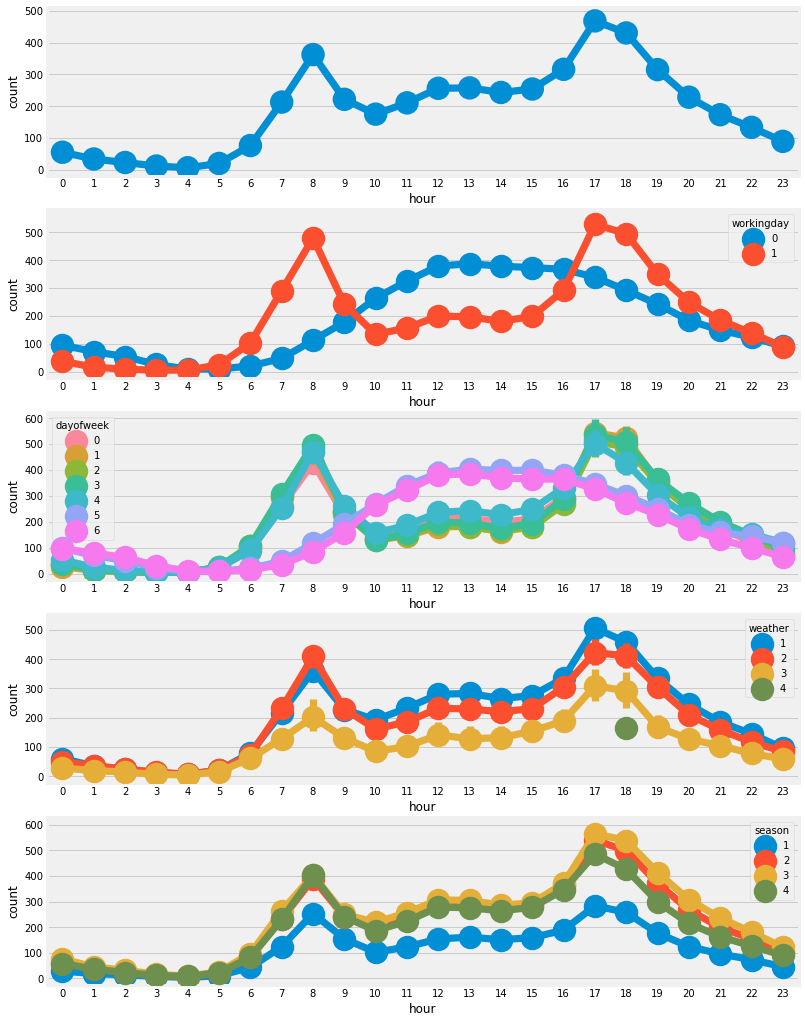

In [16]:
f, ax = plt.subplots(5,1, figsize=(12, 18))
sns.pointplot(y='count', x='hour', data=train, ax=ax[0])
sns.pointplot(y='count', x='hour', hue='workingday', data=train, ax=ax[1])
sns.pointplot(y='count', x='hour', hue='dayofweek', data=train, ax=ax[2])
sns.pointplot(y='count', x='hour', hue='weather', data=train, ax=ax[3])
sns.pointplot(y='count', x='hour', hue='season', data=train, ax=ax[4])

- 관측결과
1) 시간의 흐름에 따른 pointplot을 각 feature를 기준으로 진행
2) 전체적으로 시간의 흐름에 따라 유사한 느낌의 plot(시간이 중요함)
3) workingday: 근무 - 출퇴근 시간에 집중, 아닐때 - 낮시간에 증가하는 평이한 그래프
4) dayofweek: 주말은 낮시간에 증가하는 평이한 그래프, 주중은 출퇴근시간이 매우 핫함
5) weather: 날씨가 좋을수록 증가, 점점 감소하다가 악천후에는 아예 없는 수준
6) season: 봄이 가장 적으며, 여름 가을 겨울은 조금 차이가 있음

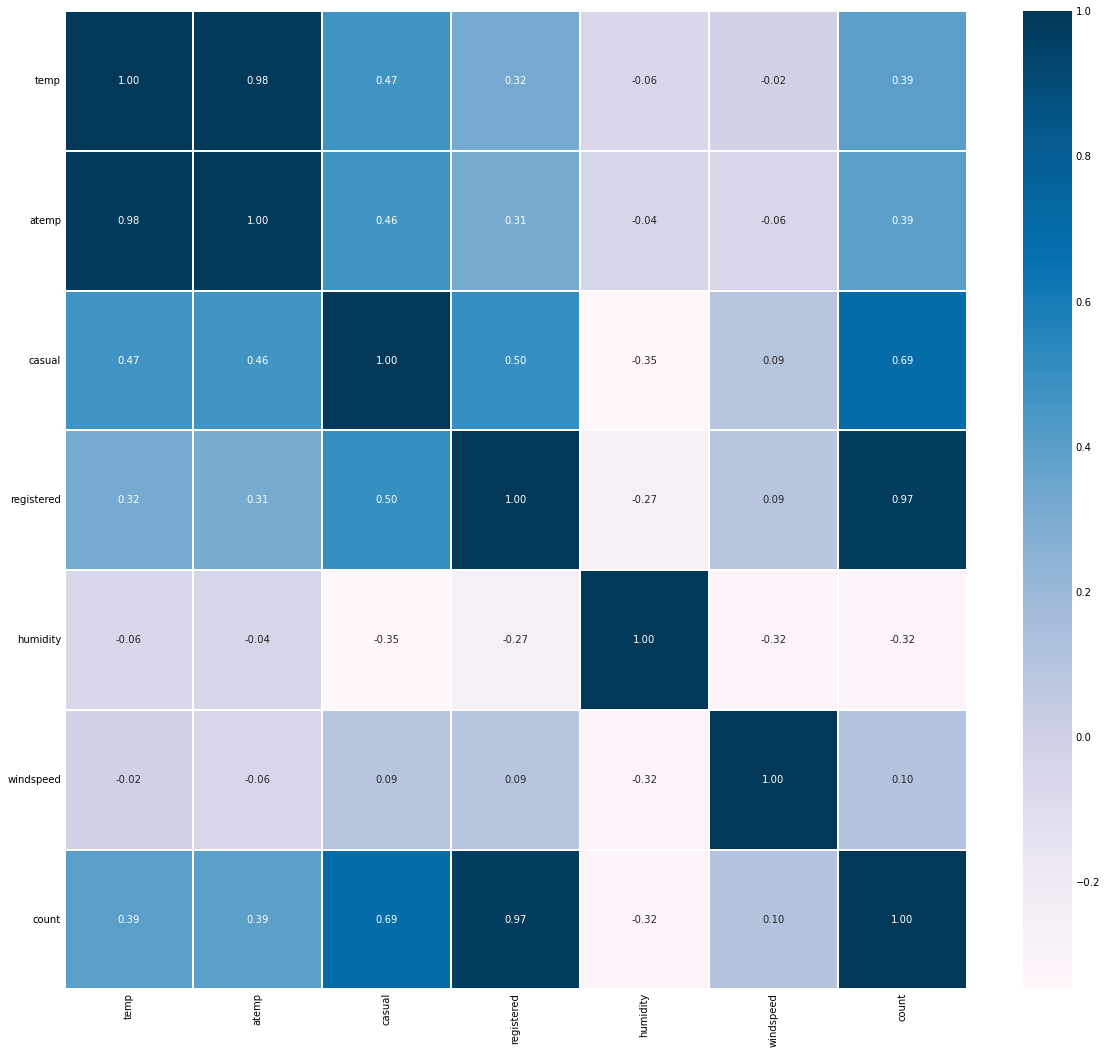

In [17]:
corr_data = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corr = corr_data.corr('pearson')
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.1, cmap='PuBu' )
f = plt.gcf()
f.set_size_inches(18, 18)

- 관측결과
1) registed, casual이랑 당연히 상관관계가 높음
2) atemp, temp의 상관관계가 높음(다중공선성)

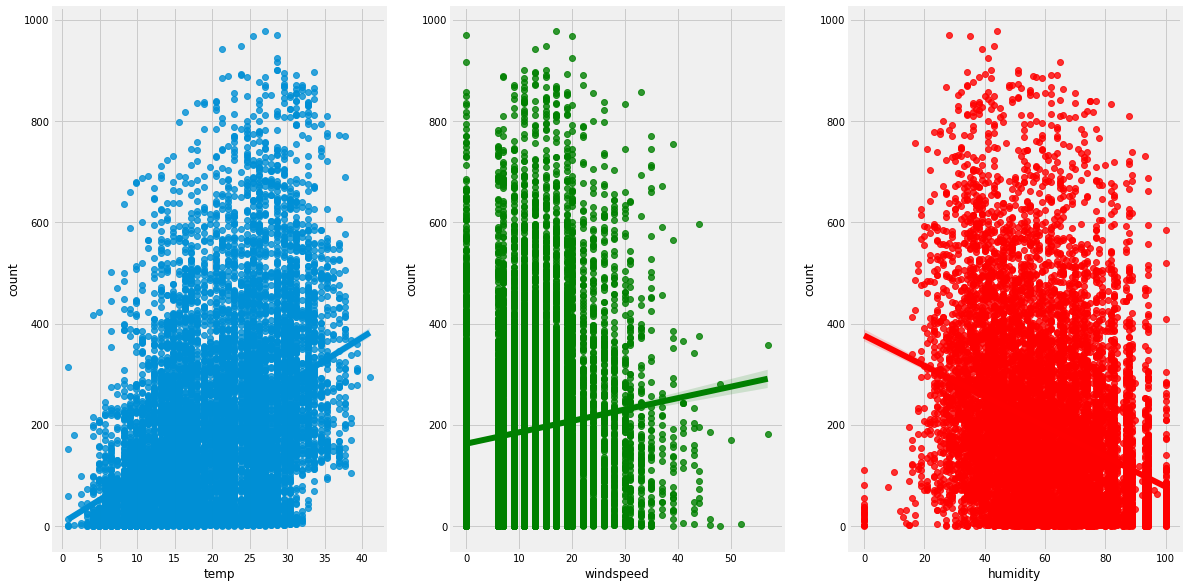

In [18]:
f, ax = plt.subplots(1, 3, figsize=(18, 10))
sns.regplot(y='count', x='temp', data= train, ax=ax[0])
sns.regplot(y='count', x='windspeed', data= train, ax=ax[1], color='green')
sns.regplot(y='count', x='humidity', data= train, ax=ax[2], color='red')

plt.show()

- 관측결과
1) heatmap에서 유의하지 않다고 판단된 변수들에 대해 regplot(scatter)를 그려보았다
2) windspeed의 경우 0에 많이 몰려 있는데 이는 null로 생각된다
3) countplot까지 보았을 때, 0을 feature engineering해주어야 할 것으로 예상된다

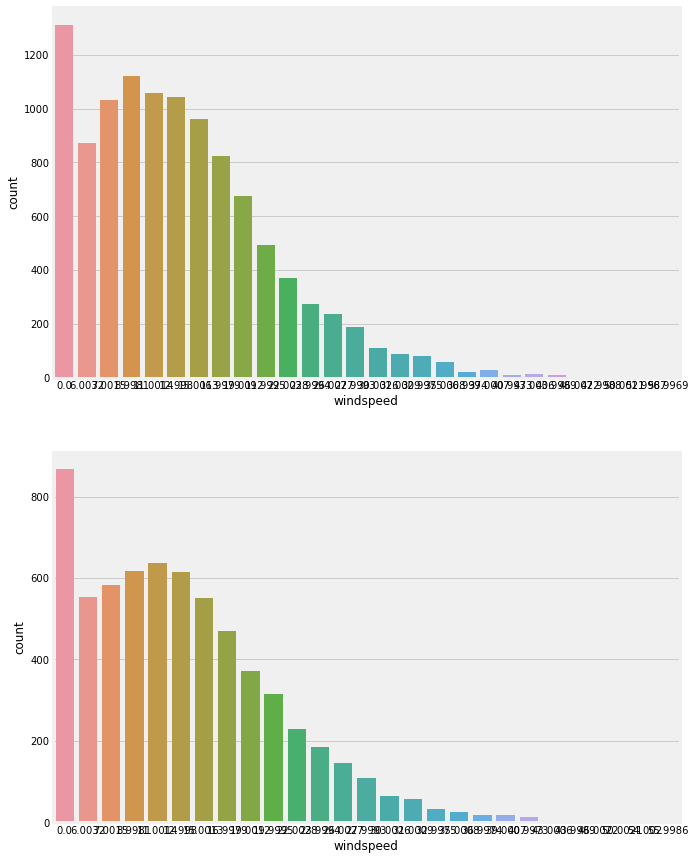

In [19]:
f, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.countplot(train['windspeed'], ax = ax[0])
sns.countplot(test['windspeed'], ax = ax[1])
plt.show()

In [20]:
def concatenate_year_month(datetime):
    return '{0}_{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
test['year_month'] = test['datetime'].apply(concatenate_year_month)

In [21]:
train.shape, test.shape

((10886, 20), (6493, 17))

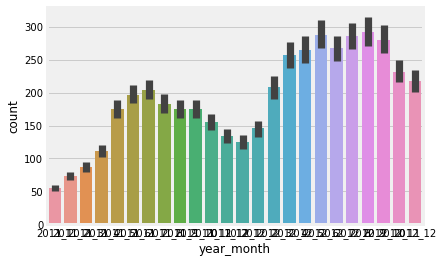

In [22]:
sns.barplot(y='count', x='year_month', data=train)
plt.show()

In [23]:
from collections import Counter
def detect_ouliers(df, n, features):
    """
    df: dataframe
    n: threshold
    features: searching feature
    """
    outlier_indices = []
    for col in features:
        x = df[features]
        q1 = np.percentile(x, 25)
        q3 = np.percentile(x, 75)
        iqr = q3 - q1
        
        outlier_step = 1.5 * iqr
        
        outlier_list_col = df[ (x < q1 - outlier_step) | (x > q3 + outlier_step) ].index
        outlier_indices.extend(outlier_list_col)
    # print(outlier_indices)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers
        
        
outliers_to_drop = detect_ouliers(train, 2, ['temp','atemp','casual','registered','humidity','windspeed','count'])
len(outliers_to_drop)

10886

In [24]:
cols = ['count', 'temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed']

for col in cols:
    x = train[col]
    print('{:15} Skewness{:05.2f} Kurtosis{:06.2f}'.format(col, x.skew(), x.kurt()))

count           Skewness01.24 Kurtosis001.30
temp            Skewness00.00 Kurtosis-00.91
atemp           Skewness-0.10 Kurtosis-00.85
casual          Skewness02.50 Kurtosis007.55
registered      Skewness01.52 Kurtosis002.63
humidity        Skewness-0.09 Kurtosis-00.76
windspeed       Skewness00.59 Kurtosis000.63


<AxesSubplot:xlabel='minute', ylabel='count'>

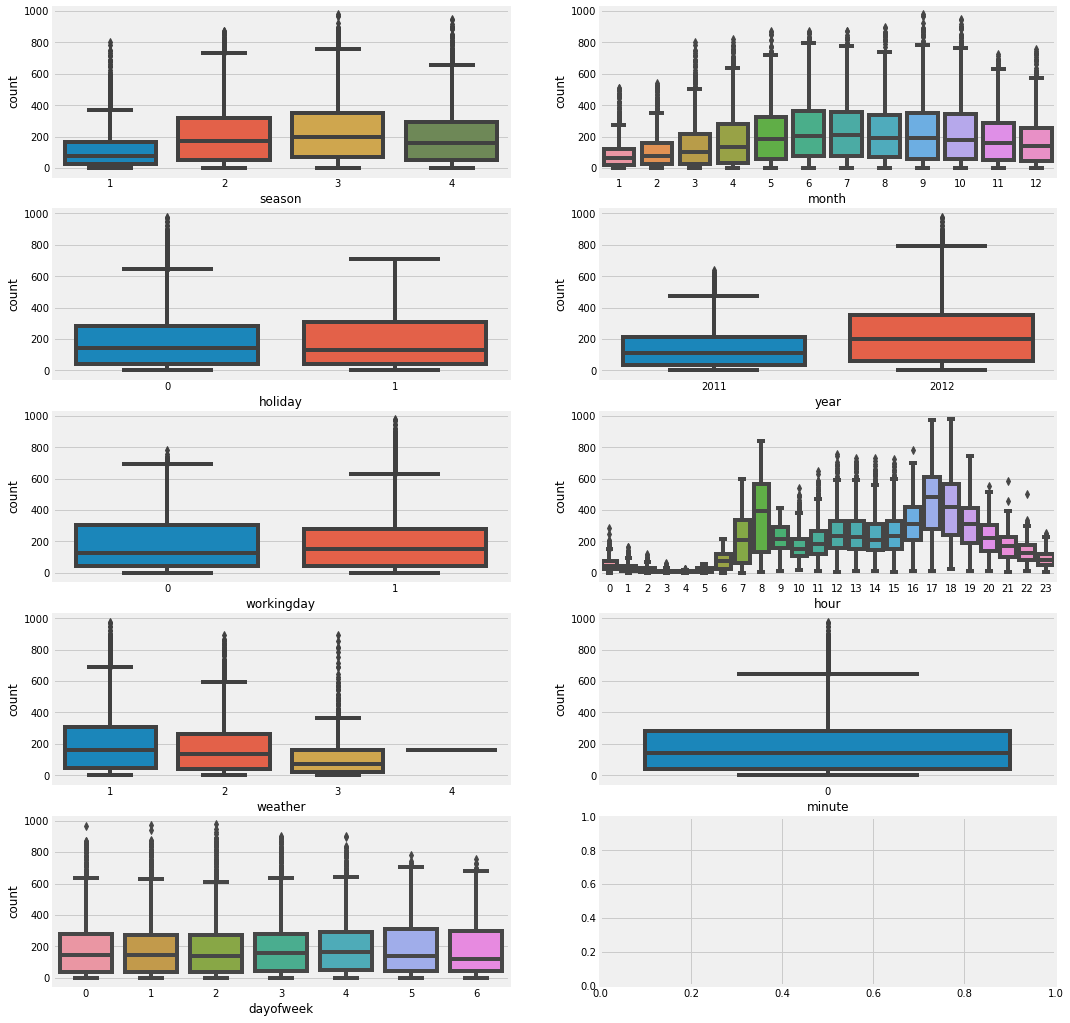

In [25]:
f, ax = plt.subplots(5, 2, figsize=(16,18))
sns.boxplot(y='count',x='season',data=train,orient='v',ax=ax[0][0])
sns.boxplot(y='count',x='holiday',data=train,orient='v',ax=ax[1][0])
sns.boxplot(y='count',x='workingday',data=train,orient='v',ax=ax[2][0])
sns.boxplot(y='count',x='weather',data=train,orient='v',ax=ax[3][0])
sns.boxplot(y='count',x='dayofweek',data=train,orient='v',ax=ax[4][0])

sns.boxplot(y='count',x='month',data=train,orient='v',ax=ax[0][1])
sns.boxplot(y='count',x='year',data=train,orient='v',ax=ax[1][1])
sns.boxplot(y='count',x='hour',data=train,orient='v',ax=ax[2][1])
sns.boxplot(y='count',x='minute',data=train,orient='v',ax=ax[3][1])
# sns.boxplot(y='count',x='season',data=train,orient='v',ax=ax[4][1])

# 3. Feature engineering
- outlier
- EDA 기반 조정

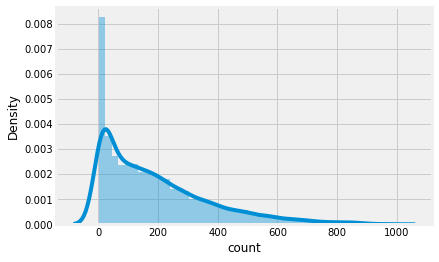

Skew: 1.2420662117180776
Kurtosis: 1.3000929518398334


In [26]:
sns.distplot(train['count'])
plt.show()
print("Skew:", train['count'].skew())
print("Kurtosis:", train['count'].kurt())

- 왜도는 0을 기준으로 판단
- 첨도는 3을 기준으로 판단

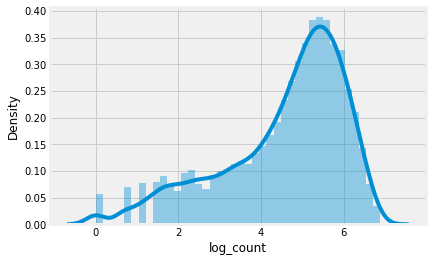

Skew: -0.9712277227866112
Kurtosis: 0.24662183416964112


In [27]:
# log scaling
train['log_count'] = train['count'].map(lambda i: np.log(i) if i > 0 else 0)
sns.distplot(train['log_count'])
plt.show()
print("Skew:", train['log_count'].skew())
print("Kurtosis:", train['log_count'].kurt())

In [28]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,minute,second,dayofweek,year_month,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2011,1,1,0,0,0,5,2011_1,2.772589
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,2011,1,1,1,0,0,5,2011_1,3.688879
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,32,2011,1,1,2,0,0,5,2011_1,3.465736
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,13,2011,1,1,3,0,0,5,2011_1,2.564949
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2011,1,1,4,0,0,5,2011_1,0.000000


In [29]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data[data['windspeed']==0]
    dataWindNot0 = data[data['windspeed']!=0]
    
    wcol = ['season', 'weather', 'humidity', 'day', 'temp', 'atemp']
    
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0['windspeed'])
    # import pdb;pdb.set_trace()
    wind0 = rf_wind.predict(dataWind0[wcol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wind0
    
    data = predictWindNot0.append(predictWind0)
    
    data['windspeed'] = data['windspeed'].astype('float')
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    return data

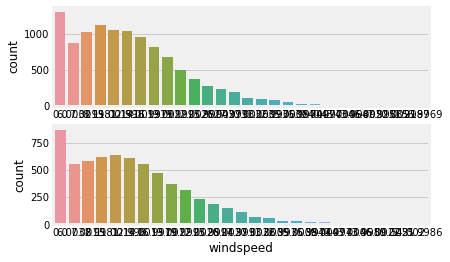

In [30]:
# train = predict_windspeed(train)
# test = predict_windspeed(test)

f, ax = plt.subplots(2,1)
sns.countplot(train['windspeed'], ax=ax[0])
sns.countplot(test['windspeed'], ax=ax[1])
plt.show()

In [31]:
corr = train[['log_count', 'windspeed']].corr('pearson')
corr

,log_count,windspeed
log_count,1.00000,0.12031
windspeed,0.12031,1.00000


In [32]:
train=pd.get_dummies(train, columns=['weather'], prefix='weather')
test=pd.get_dummies(test, columns=['weather'], prefix='weather')

train=pd.get_dummies(train, columns=['season'], prefix='season')
test=pd.get_dummies(test, columns=['season'], prefix='season')


In [33]:
train.drop(['datetime', 'registered', 'casual', 'holiday', 'year_month', 'minute', 'second'], axis=1, inplace=True)
test.drop(['datetime', 'holiday', 'year_month', 'minute', 'second'], axis=1, inplace=True)
train.shape, test.shape

((10886, 20), (6493, 18))

# 4. Modeling

In [46]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

names = ['LR', 'DT', 'RF', 'SVM', 'XGB', 'LGB']
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor())
models.append(RandomForestRegressor())
models.append(SVR())
models.append(XGBRegressor())
models.append(LGBMRegressor())

kfold = KFold(n_splits=5, shuffle=True)

y_train = train['log_count']
x_train = train.drop(['log_count','count'], axis = 1)

x_train.shape, y_train.shape

((10886, 18), (10886,))

In [47]:
# train
cv_results = []
for i in range(len(names)):
    name=names[i]
    model=models[i]
    
    cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results.append(cv_result)
    print('{}: 5 fold cross-validation score is {}+-{}'.format(name, cv_result.mean(), cv_result.std()))

LR: 5 fold cross-validation score is -1.1314980785190358+-0.02382365982117655
DT: 5 fold cross-validation score is -0.22066673637455425+-0.011505283857123131
RF: 5 fold cross-validation score is -0.11095970911597115+-0.009660781337529775
SVM: 5 fold cross-validation score is -1.9005026891188646+-0.0841316309786747
XGB: 5 fold cross-validation score is -0.10210510166350409+-0.0019965154477219853
LGB: 5 fold cross-validation score is -0.09991134410051389+-0.006113554723112404


In [48]:
x_train

,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,9.84,14.395,81,0.0000,2011,1,1,0,5,1,0,0,0,1,0,0,0
1,0,9.02,13.635,80,0.0000,2011,1,1,1,5,1,0,0,0,1,0,0,0
2,0,9.02,13.635,80,0.0000,2011,1,1,2,5,1,0,0,0,1,0,0,0
3,0,9.84,14.395,75,0.0000,2011,1,1,3,5,1,0,0,0,1,0,0,0
4,0,9.84,14.395,75,0.0000,2011,1,1,4,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,15.58,19.695,50,26.0027,2012,12,19,19,2,1,0,0,0,0,0,0,1
10882,1,14.76,17.425,57,15.0013,2012,12,19,20,2,1,0,0,0,0,0,0,1
10883,1,13.94,15.910,61,15.0013,2012,12,19,21,2,1,0,0,0,0,0,0,1
10884,1,13.94,17.425,61,6.0032,2012,12,19,22,2,1,0,0,0,0,0,0,1


In [49]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(test)
pred

array([2.41478458, 2.45021957, 2.55254583, ..., 5.60131136, 5.76719353,
       5.74443057])

In [59]:
from sklearn.model_selection import GridSearchCV
param = {
    'n_estimators':[100, 101]
}
RF = RandomForestRegressor()
gridRF = GridSearchCV(RF, param_grid=param, cv=kfold, n_jobs=-1)
gridRF.fit(x_train, y_train)
print("Best:", gridRF.best_params_)
print("Best:", gridRF.best_score_)

Best: {'n_estimators': 101}
Best: 0.9504353462284076


In [58]:
gridRF.best_params_

{'n_estimators': 100}

# 5. Predict
- submission

In [53]:
LR.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])